In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
tokyo_tower = Image.open("tokyo_tower.png")
print(type(tokyo_tower))

<class 'PIL.PngImagePlugin.PngImageFile'>


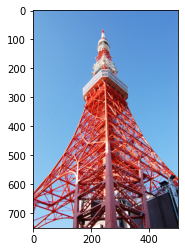

In [3]:
plt.imshow(tokyo_tower)

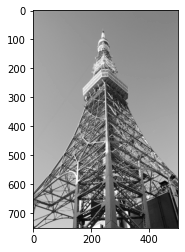

In [4]:
gray_tower = tokyo_tower.convert("L")
plt.imshow(gray_tower, cmap="gray")

In [5]:
gray_tower.save("tokyo_tower_gray.png")

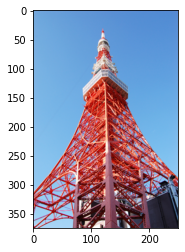

In [6]:
tokyo_tower_resized = tokyo_tower.resize((250, 375))
plt.imshow(tokyo_tower_resized)

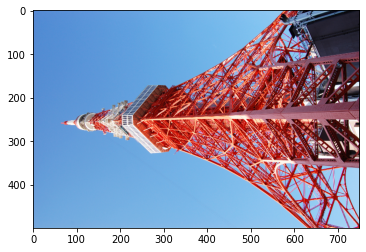

In [7]:
tokyo_tower_rotated = tokyo_tower.rotate(90, expand=True)
plt.imshow(tokyo_tower_rotated)

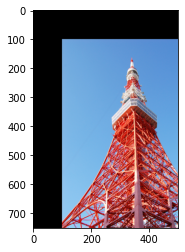

In [8]:
tokyo_tower_translated = tokyo_tower.rotate(0, translate=(100, 100))
plt.imshow(tokyo_tower_translated)

In [44]:
color_image = np.array(tokyo_tower)
print(type(color_image))
color_image

<class 'numpy.ndarray'>


array([[[116, 166, 218],
        [119, 166, 219],
        [120, 165, 219],
        ...,
        [ 86, 138, 211],
        [ 88, 137, 211],
        [ 89, 136, 211]],

       [[119, 167, 220],
        [117, 166, 218],
        [118, 165, 219],
        ...,
        [ 89, 138, 211],
        [ 85, 137, 211],
        [ 87, 137, 211]],

       [[121, 168, 220],
        [116, 167, 219],
        [118, 167, 218],
        ...,
        [ 87, 134, 209],
        [ 87, 135, 211],
        [ 90, 137, 211]],

       ...,

       [[193,  29,  20],
        [190,  17,  12],
        [164,  20,  19],
        ...,
        [ 29,  28,  42],
        [ 24,  23,  37],
        [ 17,  20,  32]],

       [[156,  34,  23],
        [171,  31,  27],
        [147,  15,  12],
        ...,
        [ 29,  27,  41],
        [ 25,  25,  39],
        [ 16,  19,  32]],

       [[157,  30,  24],
        [146,  32,  23],
        [149,  25,  20],
        ...,
        [ 29,  27,  40],
        [ 28,  28,  40],
        [ 19,  20,  34]]

In [10]:
color_image.shape

(750, 500, 3)

In [11]:
gray_image = np.array(gray_tower)
gray_image

array([[157, 158, 158, ..., 131, 131, 130],
       [159, 157, 157, ..., 132, 130, 130],
       [160, 158, 158, ..., 128, 129, 131],
       ...,
       [ 77,  68,  63, ...,  30,  25,  20],
       [ 69,  72,  54, ...,  29,  27,  20],
       [ 67,  65,  62, ...,  29,  29,  21]], dtype=uint8)

In [12]:
gray_image.shape

(750, 500)

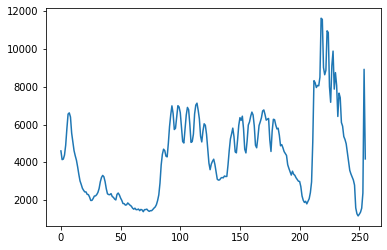

In [13]:
# 横軸が画像の色の明るさ(ピクセル単位)、縦軸が明るさ毎のピクセルの合計数
hist_c, bins_c = np.histogram(color_image.flatten(), bins=256)
plt.plot(hist_c)

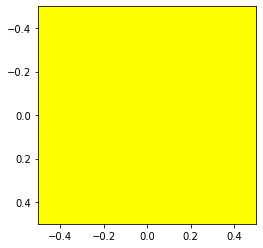

In [14]:
color_pil = Image.fromarray(np.uint8(np.array([[[255,255,0]]])))
plt.imshow(color_pil)

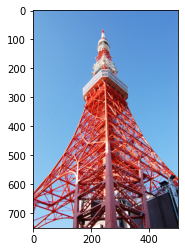

In [15]:
color_pil = Image.fromarray(np.uint8(color_image))
plt.imshow(color_pil)

<class 'numpy.ndarray'>


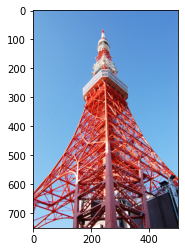

In [16]:
# numpy.ndarrayからでもimshowで画像として表示可能
print(type(color_image))
plt.imshow(color_image)

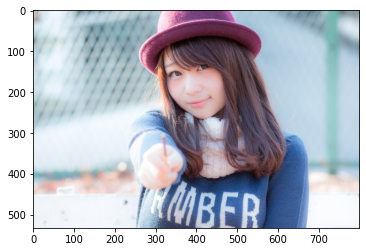

In [17]:
saya_org = Image.open("saya160104294609_TP_V4.jpg")
plt.imshow(saya_org)
saya_org_array = np.array(saya_org)

In [18]:
saya_org.width

800

In [19]:
saya_org.height

533

In [20]:
saya_org.size

(800, 533)

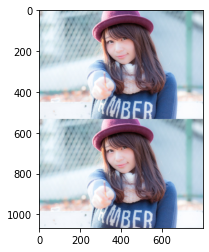

In [21]:
#（new()の最初の引数は色空間の指定、2つ目の引数は(幅, 高さ)のタプル）
saya2 = Image.new("RGB", (saya_org.width, saya_org.height * 2))

#（paste()の最初の引数は貼り付ける画像、2つ目の引数は左上の座標(横, 縦)のタプル）
saya2.paste(saya_org, (0, 0))
saya2.paste(saya_org, (0, saya_org.height))

plt.imshow(saya2)

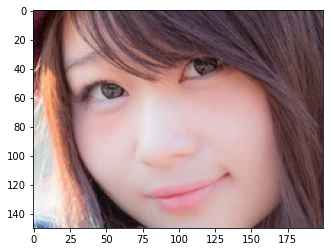

In [22]:
saya_crop = saya_org.crop((300, 100, 500, 250))

plt.imshow(saya_crop)

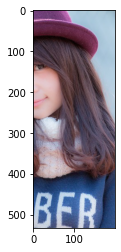

In [23]:
saya_crop_list = []
for i in range(4):
    saya_crop_list.append(saya_org.crop((200 * i, 0, 200 * (i + 1), saya_org.height)))

# 左端の画像のみ表示
plt.imshow(saya_crop_list[2])

In [24]:
saya_crop_list[0].save("saya_anim.gif",
                      save_all=True,
                      append_images=saya_crop_list[1:],
                      loop=0,
                      duration=150)

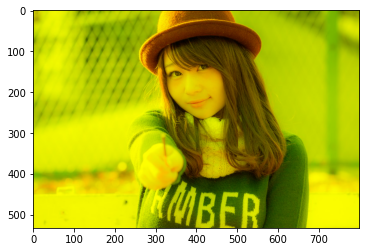

In [25]:
# 青を抜いた画像
saya_rg = np.zeros((saya_org.height, saya_org.width, 3), dtype=np.uint8)
saya_rg[:, :, 0] = saya_org_array[:, :, 0]
saya_rg[:, :, 1] = saya_org_array[:, :, 1]
plt.imshow(saya_rg)

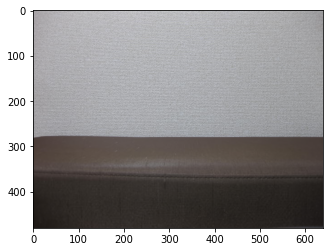

In [26]:
im1 = Image.open("home1.png")
plt.imshow(im1)

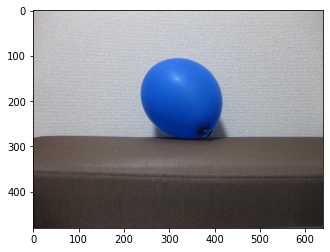

In [28]:
im2 = Image.open("home2.png")
plt.imshow(im2)

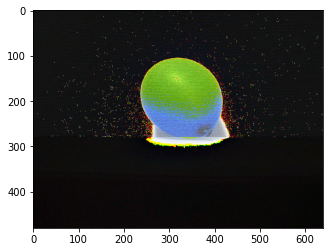

In [32]:
im1a = np.array(im1)
im2a = np.array(im2)

im2a -= im1a
plt.imshow(im2a)

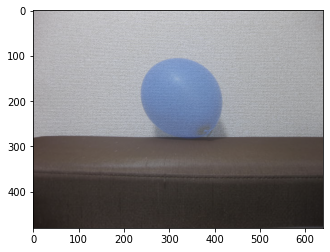

In [42]:
im3 = Image.blend(im1, im2, 0.4)
plt.imshow(im3)